In [41]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Groceries_dataset.csv")

# Display the first few rows
df.head()


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [42]:
df.isnull().sum()


Member_number      0
Date               0
itemDescription    0
dtype: int64

In [43]:
print("Number of unique transactions:", df['Member_number'].nunique())


Number of unique transactions: 3898


In [44]:
print(df['itemDescription'].value_counts().head(10))


itemDescription
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: count, dtype: int64


We group the transaction s by Member_number to form alist of items each customer purchaced .

In [ ]:

transactions = df.groupby('Member_number')['itemDescription'].apply(list).tolist()


[['soda',
  'canned beer',
  'sausage',
  'sausage',
  'whole milk',
  'whole milk',
  'pickled vegetables',
  'misc. beverages',
  'semi-finished bread',
  'hygiene articles',
  'yogurt',
  'pastry',
  'salty snack'],
 ['frankfurter',
  'frankfurter',
  'beef',
  'sausage',
  'whole milk',
  'soda',
  'curd',
  'white bread',
  'whole milk',
  'soda',
  'whipped/sour cream',
  'rolls/buns'],
 ['tropical fruit',
  'butter milk',
  'butter',
  'frozen vegetables',
  'sugar',
  'specialty chocolate',
  'whole milk',
  'other vegetables'],
 ['sausage',
  'root vegetables',
  'rolls/buns',
  'detergent',
  'frozen meals',
  'rolls/buns',
  'dental care',
  'rolls/buns'],
 ['other vegetables',
  'pip fruit',
  'root vegetables',
  'canned beer',
  'rolls/buns',
  'whole milk',
  'other vegetables',
  'hygiene articles',
  'whole milk',
  'whole milk',
  'frozen fish',
  'red/blush wine',
  'chocolate',
  'shopping bags',
  'dish cleaner',
  'packaged fruit/vegetables',
  'tropical fruit',
 

Used the TransactionEncoder to convert the list of transactions into a one-hot encoded dataframe, where each column represents an item and each row corresponds to a transaction.

In [46]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3894,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
3895,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3896,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False


The apriori algorithm was applied with a minimum support of 1%, meaning only item combinations that appear in at least 1% of transactions were considered frequent.
This step helped in identifying frequently bought itemsets.

Single Items with High Support:
"Whole milk" appears in 45% of transactions.
"Other vegetables" appear in 37% of transactions.

Frequent Item Pairs:
"Whole milk & other vegetables" appear together in 19% of transactions.
"Whole milk & rolls/buns" appear together in 17% of transactions.
"whipped/sour cream" appear together in 15% of transactions. 
Conclusion:

The itemsets with more than one item indicate items frequently purchased together.
Higher support means they appear in a large number of transactions, which makes them useful for store recommendations.

In [47]:
from mlxtend.frequent_patterns import apriori, association_rules

# Find frequent itemsets (min_support = 0.01 means 1% of transactions)
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
print(frequent_itemsets.sort_values(by="support", ascending=False).head(20))




       support                        itemsets
113   0.458184                    (whole milk)
69    0.376603              (other vegetables)
84    0.349666                    (rolls/buns)
94    0.313494                          (soda)
114   0.282966                        (yogurt)
106   0.233710                (tropical fruit)
85    0.230631               (root vegetables)
7     0.213699                 (bottled water)
89    0.206003                       (sausage)
1050  0.191380  (whole milk, other vegetables)
23    0.185480                  (citrus fruit)
1140  0.178553        (rolls/buns, whole milk)
72    0.177527                        (pastry)
76    0.170600                     (pip fruit)
92    0.168291                 (shopping bags)
14    0.165213                   (canned beer)
6     0.158799                  (bottled beer)
110   0.154695            (whipped/sour cream)
1209  0.151103              (soda, whole milk)
1241  0.150590            (whole milk, yogurt)


Used lift as the evaluation metric and set a minimum threshold of 1.0 to ensure meaningful relationships.
Filtered rules based on confidence > 0.6 and lift > 1.3 to select only strong rules and to select only 12 strongest rules.

Items with high lift values (>1.3) indicate a strong dependency.
If a customer buys Product A, they are much more likely to buy Product B.

Rules with confidence > 0.6 suggest that when a customer buys one product, there is a 60%+ chance they will buy the associated item

In [48]:
# Generate strong association rules (min_confidence = 0.2)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Select only the top 12 strongest rules
filtered_rules = rules[(rules['confidence'] > 0.6) & (rules['lift'] > 1.3)]
filtered_rules = filtered_rules.nlargest(12, 'lift')




Constructed a directed graph (using NetworkX) to represent relationships between items.
Items frequently bought together were connected by edges, where edge weights represented confidence in the association.

The network visualization helped identify key items that act as "hubs" (frequently appearing in strong rules).
Some products serve as bridge items, meaning they are linked to multiple strong associations.

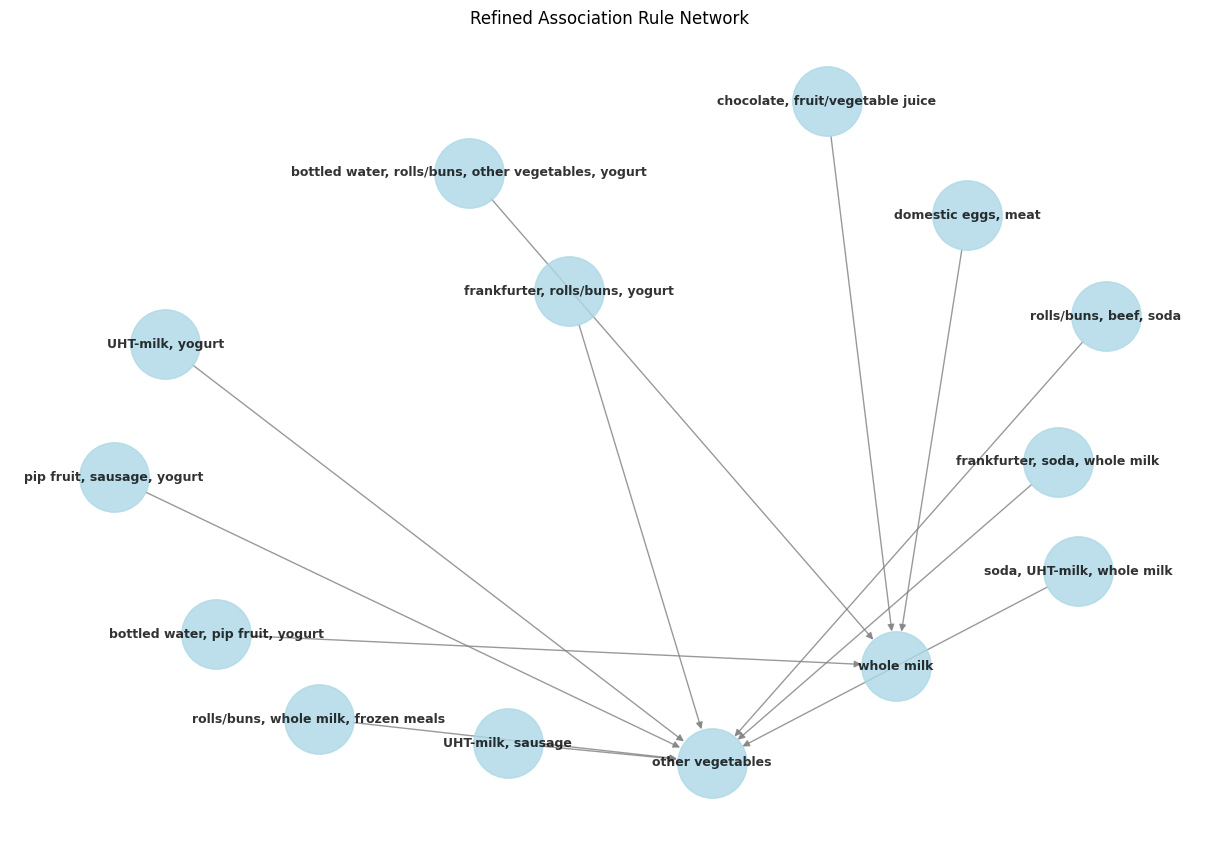

In [49]:
import networkx as nx
import matplotlib.pyplot as plt

# Create directed graph
G = nx.DiGraph()

for _, rule in filtered_rules.iterrows():
    antecedent = ', '.join(rule['antecedents'])
    consequent = ', '.join(rule['consequents'])
    G.add_edge(antecedent, consequent, weight=rule['confidence'])

# Increase spacing between nodes
pos = nx.spring_layout(G, k=1.5)

# Adjust figure size
plt.figure(figsize=(12, 8))

# Draw the network with better visibility
nx.draw(
    G, pos, with_labels=True, node_color="lightblue", edge_color="gray",
    node_size=2500, font_size=9, font_weight="bold", alpha=0.8
)

plt.title("Refined Association Rule Network")
plt.show()
